# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
pokemon = pd.read_csv('Pokemon.csv')

In [3]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## 1. Feature Selection

In [5]:
pokemon_org = pokemon.copy()

In [6]:
pokemon = pokemon.drop(['#', 'Name'], axis=1)
pokemon

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


## 2. Converting Features

### 2-1. Simple Converting

In [7]:
pokemon.dtypes

Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [8]:
pokemon['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [9]:
pokemon = pokemon.replace({'Legendary':True}, {'Legendary':1})
pokemon = pokemon.replace({'Legendary':False}, {'Legendary':0})

In [10]:
pokemon['Legendary'].value_counts()

0.0    735
1.0     65
Name: Legendary, dtype: int64

In [11]:
pokemon.dtypes

Type 1         object
Type 2         object
Total           int64
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary     float64
dtype: object

In [12]:
pokemon = pokemon.astype({'Legendary':'int64'})

In [13]:
pokemon.dtypes

Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary      int64
dtype: object

In [14]:
pokemon['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

### 2-2. Creating Dummies

In [15]:
pokemon

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [18]:
pokemon['Type 1'].value_counts(dropna=False)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [19]:
pokemon['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Ghost        14
Rock         14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [21]:
pd.set_option('display.max_columns', None)

In [23]:
pd.get_dummies(pokemon, columns=['Type 1'], drop_first=True)

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,Poison,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Poison,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Poison,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Poison,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,NaN,309,39,52,43,60,50,65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Fairy,600,50,100,150,100,150,50,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
796,Fairy,700,50,160,110,160,110,110,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
797,Ghost,600,80,110,60,150,130,70,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
798,Dark,680,80,160,60,170,130,80,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
pokemon

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [25]:
pokemon['Type 1'].value_counts().index

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric',
       'Rock', 'Dragon', 'Ghost', 'Ground', 'Dark', 'Poison', 'Fighting',
       'Steel', 'Ice', 'Fairy', 'Flying'],
      dtype='object')

In [27]:
for i in pokemon['Type 1'].value_counts().index:
    pokemon[i]=0

In [28]:
pokemon

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ghost,Ground,Dark,Poison,Fighting,Steel,Ice,Fairy,Flying
0,Grass,Poison,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
796,Rock,Fairy,700,50,160,110,160,110,110,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
798,Psychic,Dark,680,80,160,60,170,130,80,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
for n in range(0,len(pokemon)):
    for i in pokemon['Type 1'].value_counts().index:
        if pokemon['Type 1'][n]==i or pokemon['Type 2'][n]==i:
            pokemon[i][n]=1
        else:
            pokemon[i][n]=0

<ipython-input-29-290c58635ac4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon[i][n]=0
<ipython-input-29-290c58635ac4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon[i][n]=1


In [30]:
pokemon

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ghost,Ground,Dark,Poison,Fighting,Steel,Ice,Fairy,Flying
0,Grass,Poison,318,45,49,49,65,65,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
796,Rock,Fairy,700,50,160,110,160,110,110,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
798,Psychic,Dark,680,80,160,60,170,130,80,6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
pokemon.columns

Index(['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Water', 'Normal',
       'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon',
       'Ghost', 'Ground', 'Dark', 'Poison', 'Fighting', 'Steel', 'Ice',
       'Fairy', 'Flying'],
      dtype='object')

In [32]:
pokemon.iloc[:20,[0,1,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]

,Type 1,Type 2,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ghost,Ground,Dark,Poison,Fighting,Steel,Ice,Fairy,Flying
0,Grass,Poison,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Grass,Poison,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Grass,Poison,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Grass,Poison,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Fire,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Fire,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,Fire,Flying,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7,Fire,Dragon,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8,Fire,Flying,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9,Water,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
pokemon = pokemon.drop(['Type 1', 'Type 2'], axis=1)

In [35]:
pokemon

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ghost,Ground,Dark,Poison,Fighting,Steel,Ice,Fairy,Flying
0,318,45,49,49,65,65,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
796,700,50,160,110,160,110,110,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
797,600,80,110,60,150,130,70,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
798,680,80,160,60,170,130,80,6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


## 3. Missing Values

In [36]:
pokemon.isnull().sum()

Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
Water         0
Normal        0
Grass         0
Bug           0
Psychic       0
Fire          0
Electric      0
Rock          0
Dragon        0
Ghost         0
Ground        0
Dark          0
Poison        0
Fighting      0
Steel         0
Ice           0
Fairy         0
Flying        0
dtype: int64

### Substitution (with Mean, Median, Mode) or Deletion

In [37]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ghost,Ground,Dark,Poison,Fighting,Steel,Ice,Fairy,Flying
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,0.157500,0.127500,0.118750,0.090000,0.112500,0.080000,0.062500,0.072500,0.062500,0.057500,0.083750,0.06375,0.07750,0.066250,0.061250,0.047500,0.050000,0.126250
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,0.364499,0.333741,0.323696,0.286361,0.316178,0.271463,0.242213,0.259476,0.242213,0.232941,0.277186,0.24446,0.26755,0.248874,0.239938,0.212839,0.218081,0.332339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
pokemon['HP'].mean()

69.25875

In [39]:
pokemon['HP'].fillna(pokemon['HP'].mean(), inplace=True)

In [40]:
pokemon['Attack'].median()

75.0

In [41]:
pokemon['Attack'].fillna(pokemon['Attack'].median(), inplace=True)

In [42]:
pokemon['Defense'].mode()

0    70
dtype: int64

In [43]:
pokemon['Defense'].fillna(pokemon['Defense'].mode()[0], inplace=True)

In [44]:
pokemon['Speed'].dropna(inplace=True)

In [45]:
pokemon.dropna(inplace=True)

In [46]:
pokemon.fillna(0, inplace=True)

## 4. Outlier

### 4-1. Detecting Outliers with Boxplot

In [47]:
pokemon

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ghost,Ground,Dark,Poison,Fighting,Steel,Ice,Fairy,Flying
0,318,45,49,49,65,65,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
796,700,50,160,110,160,110,110,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
797,600,80,110,60,150,130,70,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
798,680,80,160,60,170,130,80,6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [48]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

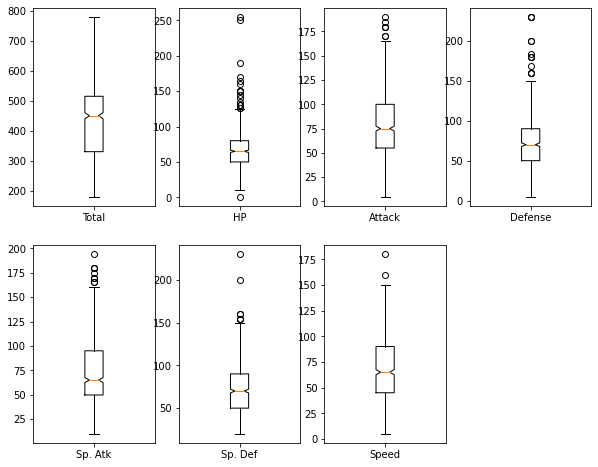

In [50]:
plt.figure(figsize=(10,8))

plt.subplot(241)
plt. boxplot(pokemon['Total'], labels=['Total'], notch=True, vert=1)

plt.subplot(242)
plt. boxplot(pokemon['HP'], labels=['HP'], notch=True, vert=1)

plt.subplot(243)
plt. boxplot(pokemon['Attack'], labels=['Attack'], notch=True, vert=1)

plt.subplot(244)
plt. boxplot(pokemon['Defense'], labels=['Defense'], notch=True, vert=1)

plt.subplot(245)
plt. boxplot(pokemon['Sp. Atk'], labels=['Sp. Atk'], notch=True, vert=1)

plt.subplot(246)
plt. boxplot(pokemon['Sp. Def'], labels=['Sp. Def'], notch=True, vert=1)

plt.subplot(247)
plt. boxplot(pokemon['Speed'], labels=['Speed'], notch=True, vert=1)

plt.show

### 4-2. Simple Deletion

In [52]:
pokemon['HP'].sort_values(ascending=False)

261    255
121    250
217    190
351    170
655    165
      ... 
487     20
388     20
139     20
55      10
316      1
Name: HP, Length: 800, dtype: int64

In [53]:
pokemon['Sp. Def'].sort_values(ascending=False)

230    230
415    200
430    160
422    160
269    154
      ... 
139     20
13      20
16      20
347     20
188     20
Name: Sp. Def, Length: 800, dtype: int64

In [56]:
pokemon_out = pokemon[(pokemon['HP']<200)&(pokemon['HP']>5)&(pokemon['Sp. Def']<200)]

### 4-3. Automatic Deletion

In [59]:
def remove_outlier(data, column):
    column_data = data[column]
    q1 = np.percentile(column_data.values, 25)
    q3 = np.percentile(column_data.values, 75)
    
    iqr = q3-q1
    outlier_index = column_data[(column_data<q1-1.5*iqr)|(column_data>q3+1.5*iqr)].index
    data = data.drop(outlier_index, axis=0)
    return data

In [61]:
pokemon_out = remove_outlier(pokemon_out, 'Speed')

<function matplotlib.pyplot.show(close=None, block=None)>

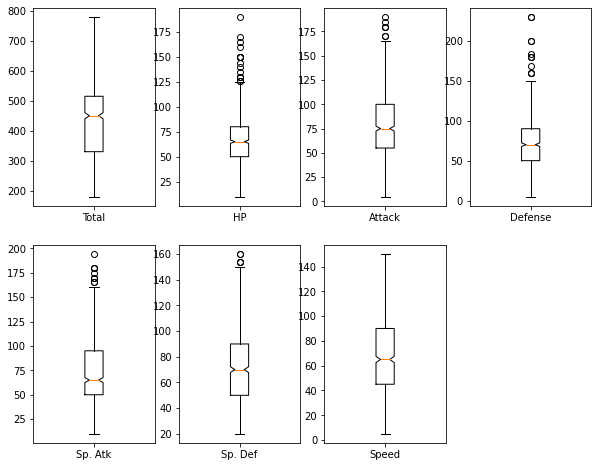

In [63]:
plt.figure(figsize=(10,8))

plt.subplot(241)
plt. boxplot(pokemon_out['Total'], labels=['Total'], notch=True, vert=1)

plt.subplot(242)
plt. boxplot(pokemon_out['HP'], labels=['HP'], notch=True, vert=1)

plt.subplot(243)
plt. boxplot(pokemon_out['Attack'], labels=['Attack'], notch=True, vert=1)

plt.subplot(244)
plt. boxplot(pokemon_out['Defense'], labels=['Defense'], notch=True, vert=1)

plt.subplot(245)
plt. boxplot(pokemon_out['Sp. Atk'], labels=['Sp. Atk'], notch=True, vert=1)

plt.subplot(246)
plt. boxplot(pokemon_out['Sp. Def'], labels=['Sp. Def'], notch=True, vert=1)

plt.subplot(247)
plt. boxplot(pokemon_out['Speed'], labels=['Speed'], notch=True, vert=1)

plt.show

In [64]:
pokemon_out_all = remove_outlier(pokemon_out, 'HP')
pokemon_out_all = remove_outlier(pokemon_out_all, 'Attack')
pokemon_out_all = remove_outlier(pokemon_out_all, 'Defense')
pokemon_out_all = remove_outlier(pokemon_out_all, 'Sp. Atk')
pokemon_out_all = remove_outlier(pokemon_out_all, 'Sp. Def')

<function matplotlib.pyplot.show(close=None, block=None)>

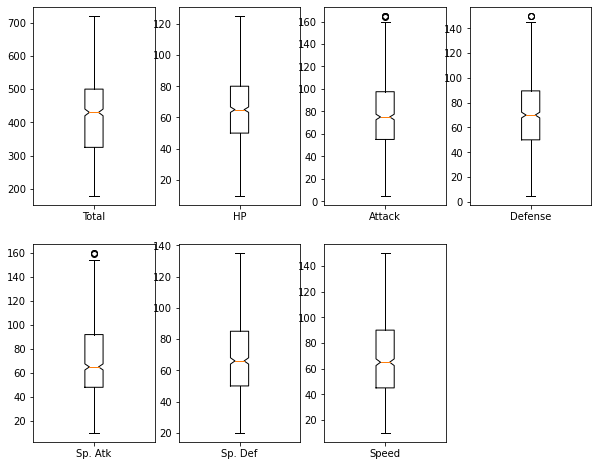

In [65]:
plt.figure(figsize=(10,8))

plt.subplot(241)
plt. boxplot(pokemon_out_all['Total'], labels=['Total'], notch=True, vert=1)

plt.subplot(242)
plt. boxplot(pokemon_out_all['HP'], labels=['HP'], notch=True, vert=1)

plt.subplot(243)
plt. boxplot(pokemon_out_all['Attack'], labels=['Attack'], notch=True, vert=1)

plt.subplot(244)
plt. boxplot(pokemon_out_all['Defense'], labels=['Defense'], notch=True, vert=1)

plt.subplot(245)
plt. boxplot(pokemon_out_all['Sp. Atk'], labels=['Sp. Atk'], notch=True, vert=1)

plt.subplot(246)
plt. boxplot(pokemon_out_all['Sp. Def'], labels=['Sp. Def'], notch=True, vert=1)

plt.subplot(247)
plt. boxplot(pokemon_out_all['Speed'], labels=['Speed'], notch=True, vert=1)

plt.show

In [66]:
pokemon_out_all

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ghost,Ground,Dark,Poison,Fighting,Steel,Ice,Fairy,Flying
0,318,45,49,49,65,65,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,535,85,70,80,97,80,123,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
794,600,108,100,121,81,95,95,6,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
796,700,50,160,110,160,110,110,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
797,600,80,110,60,150,130,70,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
